## In this jupyter notebook, <font color='#ff009a'> resampling </font> and <font color='#ff009a'> masking </font> are undertaken as part of preparing the data for further analyses. 
**i)  Resampling and ii) masking out (filitering out non-cropped area)**
**=====================================================================================================================**
![title](img/Fig1.png)
**=====================================================================================================================**

## <font color='green'>1 Import modules/libraries</font>

In [1]:
import os                             # a module for interacting with the operating system
import glob                           # used to retrieve files/pathnames matching a specified pattern
import matplotlib.pyplot as plt       # is a plotting library used for 2D graphics in python 
import numpy as np                    # stands for 'Numerical Python, is a python library used for scientific computing with arrays

os.chdir(os.path.join(os.path.split(os.getcwd())[0], "Modules"))
from GIS_functions import GIS_function as gis

# <font color='#ff009a'>2 Reample raster data</font>

## <font color='blue'>a) Import the input data </font>

In [2]:
dir_proj = os.path.split(os.getcwd())[0] 
dir_data = "Data"
    
source_file   = os.path.join(dir_proj, dir_data,   "1L2_AETI_D", "L2_AETI_0901.tif") # Read gdal info of template raster file  
target_folder = os.path.join(dir_proj, dir_data,   "0L1_RET_D")                      # data to be resampled 
target_fhs    = glob.glob(target_folder + '\*.tif')

source_file, target_fhs

('E:\\WAPORWP\\Data\\1L2_AETI_D\\L2_AETI_0901.tif',
 ['E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0901.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0902.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0903.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0904.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0905.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0906.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0907.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0908.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0909.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0910.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0911.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0912.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0913.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0914.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0915.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0916.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0917.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_D\\L1_RET_0918.tif',
  'E:\\WAPORWP\\Data\\0L1_RET_

In [3]:
## The ssize and shape of the raster files
template   = gis.OpenAsArray(source_file, nan_values=True) 
original   = gis.OpenAsArray(target_fhs[0], nan_values=True)

print ('The size & shape of the template raster      =', template.size,  '&', template.shape)
print ('The size & shape of the data to be resampled =', original.size,  '&', original.shape)

The size & shape of the template raster      = 37750 & (151, 250)
The size & shape of the data to be resampled = 56 & (7, 8)


## <font color='blue'>b) Make or connect with the directory the output folder</font>

In [4]:
dir_proj = os.path.split(os.getcwd())[0] 
dir_data = "Data"

output_folder = os.path.join(dir_proj, dir_data, "1L1_RET_D") 

## Make one if the folder does not exit
if not os.path.exists(output_folder):
    os.makedirs(output_folder) 
    
output_folder

'E:\\WAPORWP\\Data\\1L1_RET_D'

## <font color='blue'>c) Resample raster data</font>

In [5]:
Resample = gis.MatchProjResNDV (source_file, target_fhs, output_folder, resample = 'near', dtype = 'float32')

In [6]:
## The size and shape of the resampled raster files
Resampled   = os.path.join(dir_proj, dir_data,   "1L1_RET_D", "L1_RET_0901.tif") 
resampled   = gis.OpenAsArray(Resampled , nan_values=True)

print ('The size & shape of the resampled data =', resampled.size,  '&', resampled.shape)

The size & shape of the resampled data = 37750 & (151, 250)




# <font color='#ff009a'>3 Filiter non-croppped area using land cover map and project boundary </font>
In WaPOR LCC layer, pixel value <font color='#ff009a'> **42** represents irrigated cropland </font> (See https://wapor.apps.fao.org/catalog/2/L2_LCC_A). 
![title](img/Fig1_2.png)

## <font color='blue'>a) Import the input data </font>

In [7]:
dir_proj = os.path.split(os.getcwd())[0]  
dir_data = "Data"
    
L1_AETI_tif = os.path.join(dir_proj, dir_data, "1L2_AETI_D",        "L2_AETI_0901.tif") 
L2_LCC_tif  = os.path.join(dir_proj, dir_data, "1L2_LCC_A",        "L2_LCC_09.tif")
ProArea     = gis.OpenAsArray(r'..\Data\1Boundary\mask_irrigation_types.tif', nan_values=True)  # the project boundary/area (tif)

C:\Users\ach006\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


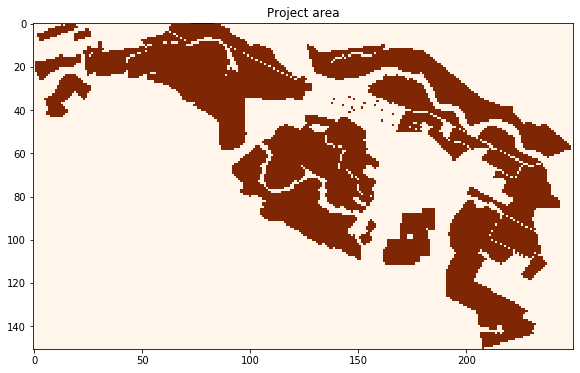

In [8]:
# Plot project area 
Projectboundary = ProArea<3

# Plot
plt.figure(figsize = (12,6))
plt.imshow(Projectboundary, cmap='Oranges')                          
plt.title('Project area')
plt.show()

#### <font color='blue'> # Plot raster layer (before removing the non-cropped area)</font>

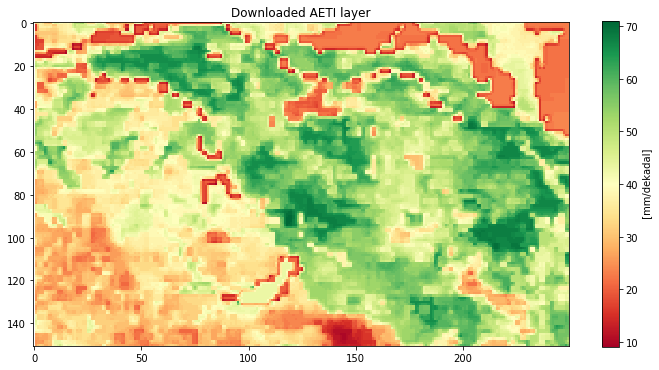

In [9]:
# Plot REF layer 
AETI_tif = gis.OpenAsArray(L1_AETI_tif,nan_values=True)

plt.figure(figsize = (12,8))
plt.imshow(AETI_tif, cmap='RdYlGn')
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')
plt.title('Downloaded AETI layer')
plt.show()

#### <font color='blue'> # Plot raser layer on irrigated cropped land (masking out non-irrigated cropped land)</font>

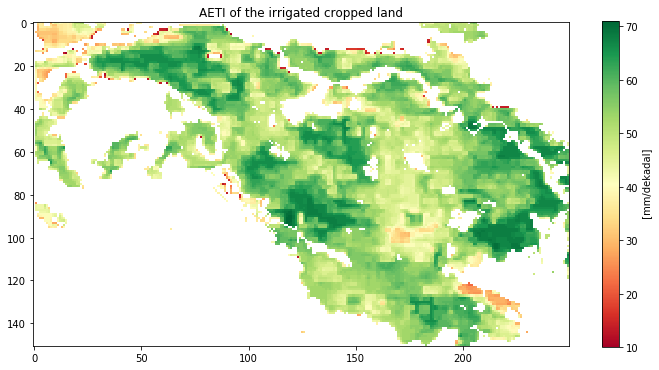

In [10]:
# Mask out the non-irrigated cropped land
LCC       = gis.OpenAsArray(L2_LCC_tif,nan_values=True)  # land cover map
AETI_crop = np.where((LCC==42),AETI_tif,np.nan)          # Show AETI on irrigated crop land, which has land class value of 42

# Plot AETI on irrigated cropped land
plt.figure(figsize = (12,8))
plt.imshow(AETI_crop, cmap='RdYlGn')    
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')                          
plt.title('AETI of the irrigated cropped land')
plt.show()

#### <font color='blue'> # Plot raser layer on  irrigated cropped land and within the boundary of the scheme</font>

C:\Users\ach006\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


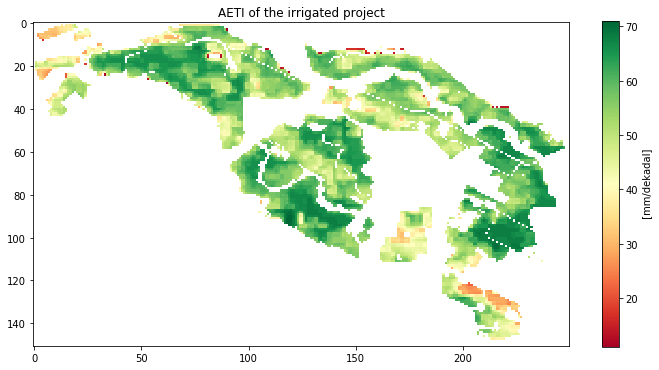

In [11]:
# Mask out the non-irrigated cropped land and area outside the scheme boundary
AETI_boundary = np.where((LCC==42)& (ProArea<4),AETI_tif,np.nan) # masking out the non-irrigated crop land and areas outside the projedct area

# Plot
plt.figure(figsize = (12,8))
plt.imshow(AETI_boundary, cmap='RdYlGn')   
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')                          
plt.title('AETI of the irrigated project')
plt.show()